<a href="https://colab.research.google.com/github/mounirHai/Baysian-Hierarchical-Model-For-Predictive-Analysis/blob/master/ODSC_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
try:import pymc3 as pm
except:
     from pip._internal import main
     main(['install', 'pymc3'])
     import pymc3 as pm

# Simple Linear Regression

In [0]:
plt.style.use('seaborn-darkgrid')

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = 1

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)


# Simulate outcome variable
Y = alpha + beta*X1 + np.random.randn(size)*sigma

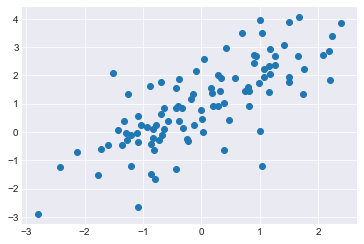

In [0]:
%matplotlib inline

plt.scatter(X1,Y)

In [0]:
regression_model = pm.Model()

with regression_model:

    
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=1, sd=5)
    sigma = pm.HalfNormal('sigma', sd=1)

    
    mu = alpha + beta*X1 

    
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

In [0]:
map_estimate = pm.find_MAP(model=regression_model)

map_estimate

logp = -145.28, ||grad|| = 0.00053681: 100%|███████████████████████████████████████████| 13/13 [00:00<00:00, 57.23it/s]


{'alpha': array(0.9808226281921901),
 'beta': array(0.9834145725652683),
 'sigma': array(0.965384872601231),
 'sigma_log__': array(-0.03522842544425719)}

In [0]:
# Inference button (TM)!
with regression_model:
    regression_model = pm.sample(draws=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_log__, beta, alpha]


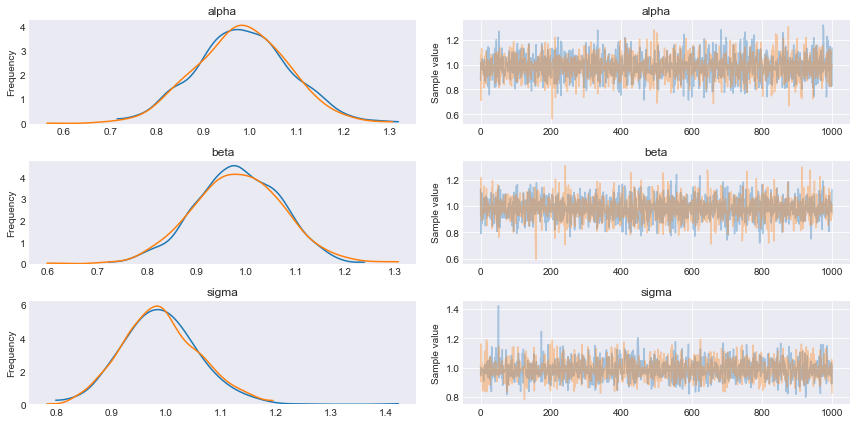

In [0]:
_ = pm.traceplot(regression_model)

In [0]:
pm.summary(regression_model)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,0.981827,0.099622,0.001665,0.792680,1.175743,3310.558567,0.999946
beta,0.982260,0.088611,0.001439,0.804604,1.146917,2910.827607,0.999500
sigma,0.988794,0.068678,0.001482,0.863327,1.130287,2247.241428,0.999507


# Flight Delay Model

in next two examples we are using US flight data of 2008. The data is available http://stat-computing.org/dataexpo/2009/the-data.html along with data dictionary. 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

df=pd.read_csv('https://drive.google.com/open?id=1Jn6C6QIhI_MWzLPrkMCoj9_uZ8gHbrRH')
df['Season']=np.where(df['Month'] <= 6, '1', '2')
df_top_airport=df[(df['Origin'] == 'ATL')|(df['Origin'] == 'ORD')|(df['Origin'] == 'DFW')]
df.head()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


ParserError: ignored

# Single Airport

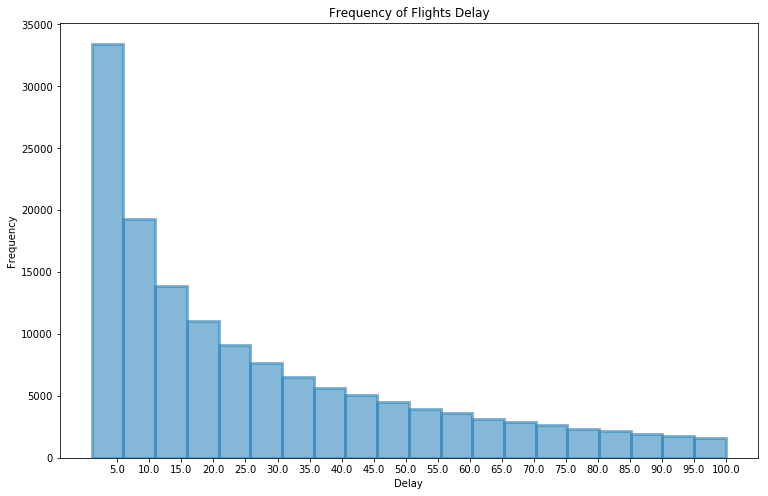

In [0]:
x=df[(df['Origin'] == 'ORD')&(df['DepDelay']>0)]
x=x['DepDelay'].fillna(0)

Bin=20
Max=100
a = np.arange(Bin)*(Max/Bin)+(Max/Bin)
plt.figure(figsize=(12.5, 8))

plt.xticks(a , a)
plt.hist(x,range=[1, Max],bins=Bin, cumulative=False, color='#348ABD',alpha=0.60,edgecolor='#348ABD', lw="3") 
plt.ylabel("Frequency")
plt.xlabel("Delay")
plt.title("Frequency of Flights Delay")

plt.show()



In [0]:
Flight_Delay = pm.Model()

with Flight_Delay:   
    
    # Prior Distribution    
    rate = pm.Gamma('rate', 2, 2) 

    # Likelihood (sampling distribution) of observations    
    Y_obs = pm.Exponential('Y_obs', rate, observed=x)
    

In [0]:
# Inference button (TM)!
with basic_model_1:
    basic_model_1 = pm.sample(draws=50)

Only 50 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [rate_log__]


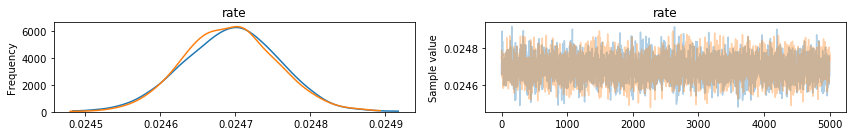

In [0]:
_ = pm.traceplot(basic_model_1)
plt.show()

In [0]:
pm.summary(basic_model)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
rate,0.024649,0.000143,0.000002,0.024375,0.02493,3667.524724,1.000105


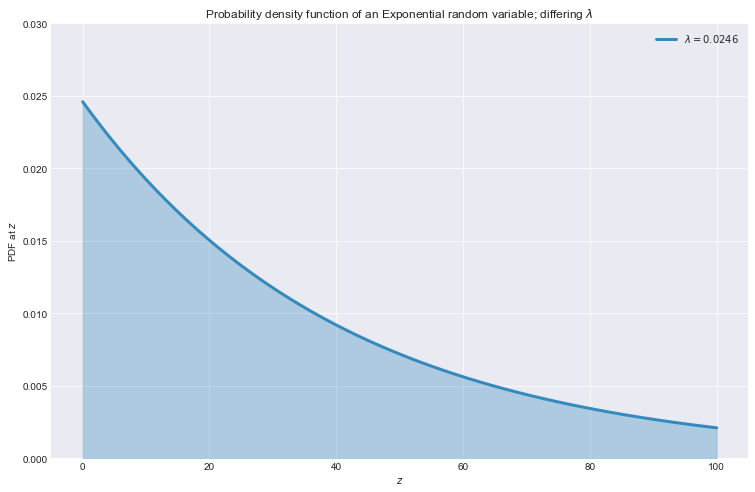

In [0]:
a = np.linspace(0, 100, 100)
expo = sts.expon

l = 0.0246
c ="#348ABD"

plt.figure(figsize=(12.5, 8))

plt.plot(a, expo.pdf(a, scale=1./l), lw=3,
             color=c, label="$\lambda = %.4f$" % l)
plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=.33)


plt.legend()
plt.ylabel("PDF at $z$")
plt.xlabel("$z$")
plt.ylim(0,0.03)
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$")

plt.show()

# Multi airports

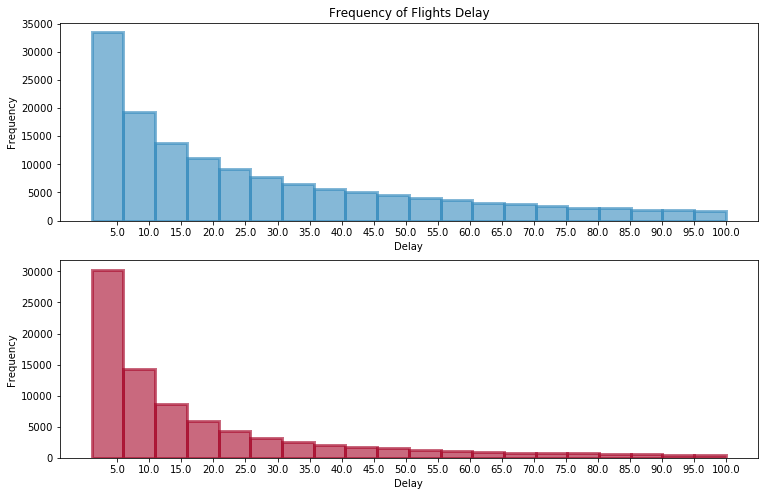

In [0]:
x=df[(df['Origin'] == 'ORD')&(df['DepDelay']>0)]
x=x['DepDelay'].fillna(0)

y=df[(df['Origin'] == 'IAH')&(df['DepDelay']>0)]
y=y['DepDelay'].fillna(0)

Bin=20
Max=100
a = np.arange(Bin)*(Max/Bin)+(Max/Bin)
plt.figure(figsize=(12.5, 8))

plt.subplot(2, 1, 1)
plt.xticks(a , a)
plt.hist(x,range=[1, Max],bins=Bin, cumulative=False, color='#348ABD',alpha=0.60,edgecolor='#348ABD', lw="3") 
plt.ylabel("Frequency")
plt.xlabel("Delay")
plt.title("Frequency of Flights Delay")

plt.subplot(2, 1, 2)
plt.xticks(a , a)
plt.hist(y,range=[1, Max],bins=Bin, cumulative=False, color='#A60628',alpha=0.60,edgecolor='#A60628', lw="3") 
plt.ylabel("Frequency")
plt.xlabel("Delay")

plt.show()

In [0]:
z=df[((df['Origin'] == 'ORD')&(df['DepDelay']>0))|((df['Origin'] == 'IAH')&(df['DepDelay']>0))]
z1=z[['Origin','DepDelay']]

In [0]:
airports = z1.Origin.unique()
airport_lookup = dict(zip(airports, range(len(airports))))
airport = z1['airport_code'] = z1.Origin.replace(airport_lookup).values

C:\Users\ameimand\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
z1.head()

,Origin,DepDelay,airport_code
94059,ORD,71.0,0
94076,IAH,1.0,1
94081,IAH,3.0,1
94097,IAH,3.0,1
94099,IAH,4.0,1


# Unpooled model

In [0]:
Delay = z1.DepDelay.values

Flight_Delay = pm.Model()

with Flight_Delay:    
    # Prior Distribution
    rate = pm.Gamma('rate', 2, 2,shape=2) 
    
    
    rate_hat=rate[airport]
    # Likelihood (sampling distribution) of observations    
    Y_obs = pm.Exponential('Y_obs', rate_hat, observed=Delay)
    

In [0]:
map_estimate = pm.find_MAP(model=Flight_Delay)

map_estimate

logp = -1.119e+06, ||grad|| = 3.5352: 100%|████████████████████████████████████████████| 13/13 [03:05<00:00, 14.28s/it]


{'rate': array([ 0.02469461,  0.03915555]),
 'rate_log__': array([-3.70117029, -3.2402131 ])}

In [0]:
# Inference button (TM)!
with Flight_Delay:
    Flight_Delay = pm.sample(draws=500)

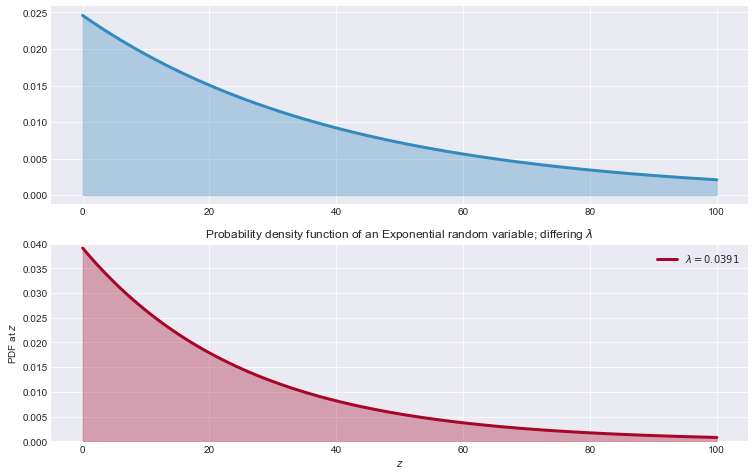

In [0]:
a = np.linspace(0, 100, 100)
expo = sts.expon

l = 0.0246
c ="#348ABD"

plt.figure(figsize=(12.5, 8))

plt.subplot(2, 1, 1)
plt.plot(a, expo.pdf(a, scale=1./l), lw=3,
             color=c, label="$\lambda = %.4f$" % l)
plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=.33)

l = 0.0391
c ="#A60628"

plt.subplot(2, 1, 2)
plt.plot(a, expo.pdf(a, scale=1./l), lw=3,
             color=c, label="$\lambda = %.4f$" % l)
plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=.33)


plt.legend()
plt.ylabel("PDF at $z$")
plt.xlabel("$z$")
plt.ylim(0,0.04)
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$")

plt.show()

# Hierarchical Model

In [0]:
Delay = z1.DepDelay.values

Flight_Delay = pm.Model()

with Flight_Delay:    
    # Prior Distribution
    alpha = pm.Normal('alpha', mu=2, sd=5)
    beta = pm.Normal('beta', mu=2, sd=5)
    
    rate = pm.Gamma('rate', alpha, beta,shape=2) 
    
    
    rate_hat=rate[airport]
    # Likelihood (sampling distribution) of observations    
    Y_obs = pm.Exponential('Y_obs', rate_hat, observed=Delay)

C:\Users\ameimand\AppData\Local\Continuum\Anaconda3\lib\site-packages\pymc3\distributions\continuous.py:66: UserWarning: The variable specified for alpha has negative support for Gamma, likely making it unsuitable for this parameter.
  warnings.warn(msg)
C:\Users\ameimand\AppData\Local\Continuum\Anaconda3\lib\site-packages\pymc3\distributions\continuous.py:66: UserWarning: The variable specified for beta has negative support for Gamma, likely making it unsuitable for this parameter.
  warnings.warn(msg)


In [0]:
map_estimate = pm.find_MAP(model=Flight_Delay)

map_estimate

logp = -1.119e+06, ||grad|| = 7.5596: 100%|████████████████████████████████████████████| 13/13 [02:01<00:00,  9.36s/it]


{'alpha': array(1.9996264737886649),
 'beta': array(2.000120991083269),
 'rate': array([ 0.02469464,  0.03915548]),
 'rate_log__': array([-3.70116894, -3.24021496])}